In [2]:
import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis (DataFrames)
import matplotlib.pyplot as plt  # For plotting static, interactive, and animated visualizations
import seaborn as sns  # For advanced data visualization (built on top of matplotlib)

In [3]:
filepath = "/Users/abdullahlatif/Desktop/Python_Projects/sales_analysis/summer-products-with-rating-and-performance_2020-08.csv"
df = pd.read_csv(filepath)  # Load CSV data into DataFrame
print(df.head())  # Display first 5 rows

                                               title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4  Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45        

In [4]:
print(df["retail_price"].dtype)  # Print the data type of the 'retail_price' column
print(df["retail_price"].unique()[:20])  # Print the first 20 unique values in the 'retail_price' column
print(df["retail_price"])  # Print all values in the 'retail_price' column

int64
[14 22 43  8  3  9  6 11 84  5 42  2 81 10 25  7 26 32 76 17]
0       14
1       22
2       43
3        8
4        3
        ..
1568     9
1569    56
1570    19
1571    11
1572     6
Name: retail_price, Length: 1573, dtype: int64


In [8]:
print(df.isnull().sum())  # Print the count of missing values in each column

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [10]:
print(df.columns)  # Print the list of column names in Dataset

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')


In [12]:
# Fill missing values in 'retail_price' with the median
df["retail_price"] = df["retail_price"].fillna(df["retail_price"].median())
# Fill missing values in 'price' with the median
df["price"] = df["price"].fillna(df["price"].median())
# Fill missing values in 'crawl_month' with 'UNKNOWN'
df["crawl_month"] = df["crawl_month"].fillna("UNKNOWN") 

In [14]:
print(df["crawl_month"].dtype)  # Print the data type of the 'crawl_month' column
print(df["units_sold"].dtype)  # Print the data type of the 'units_sold' column

object
int64


In [16]:
print(df.head(10))  # Print the first 10 rows of the Dataset

                                               title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   
5  Plus la taille d'été femmes décontracté sans m...   
6  Women Fashion Loose Lace Blouse Blouse V Neck ...   
7  Robe tunique ample femme Robe d'été Robe en je...   
8  Robe d'été décontractée à manches courtes pour...   
9  Femmes d'été, plus la taille décontractée lâch...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8  

In [18]:
print(df.dtypes)  # Print the data type of each column in the Dataset

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


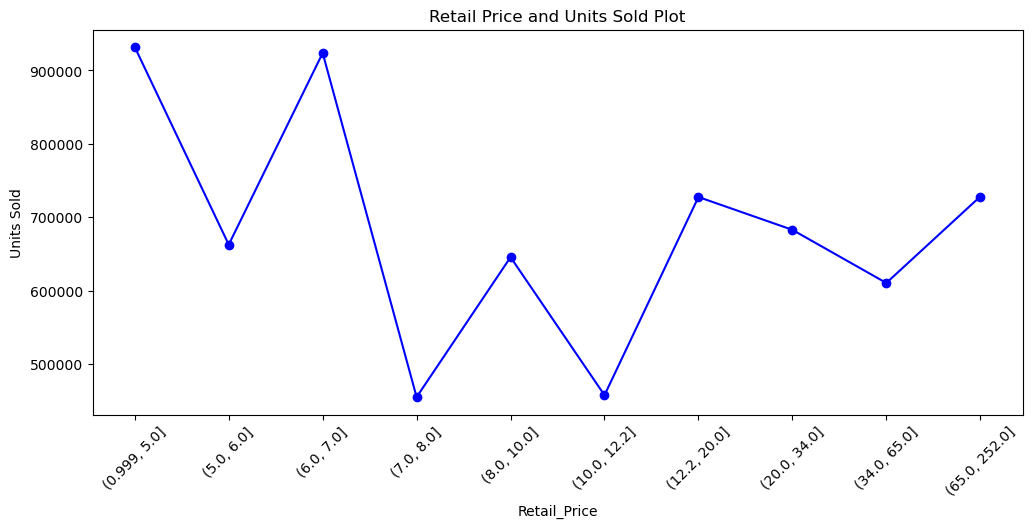

In [22]:
# Create bins for 'retail_price' using quantiles
df["retail_price_bin"] = pd.qcut(df["retail_price"], q = 10)
# Group by 'retail_price_bin' and sum 'units_sold'
sales_grouped = df.groupby("retail_price_bin", observed=True)["units_sold"].sum()  
plt.figure(figsize = (12, 5))  # Set the figure size for the plot
# Plot the data with markers and line
plt.plot(sales_grouped.index.astype(str), sales_grouped.values, marker = 'o', linestyle = '-', color = 'b')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Retail_Price")  # Set the x-axis label
plt.ylabel("Units Sold")  # Set the y-axis label
plt.title("Retail Price and Units Sold Plot")  # Set the title of the plot
plt.savefig("retail_price_vs_units_sold.png", dpi=300, bbox_inches="tight") # Saves as PNG with high resolution
plt.show()  # Display the plot

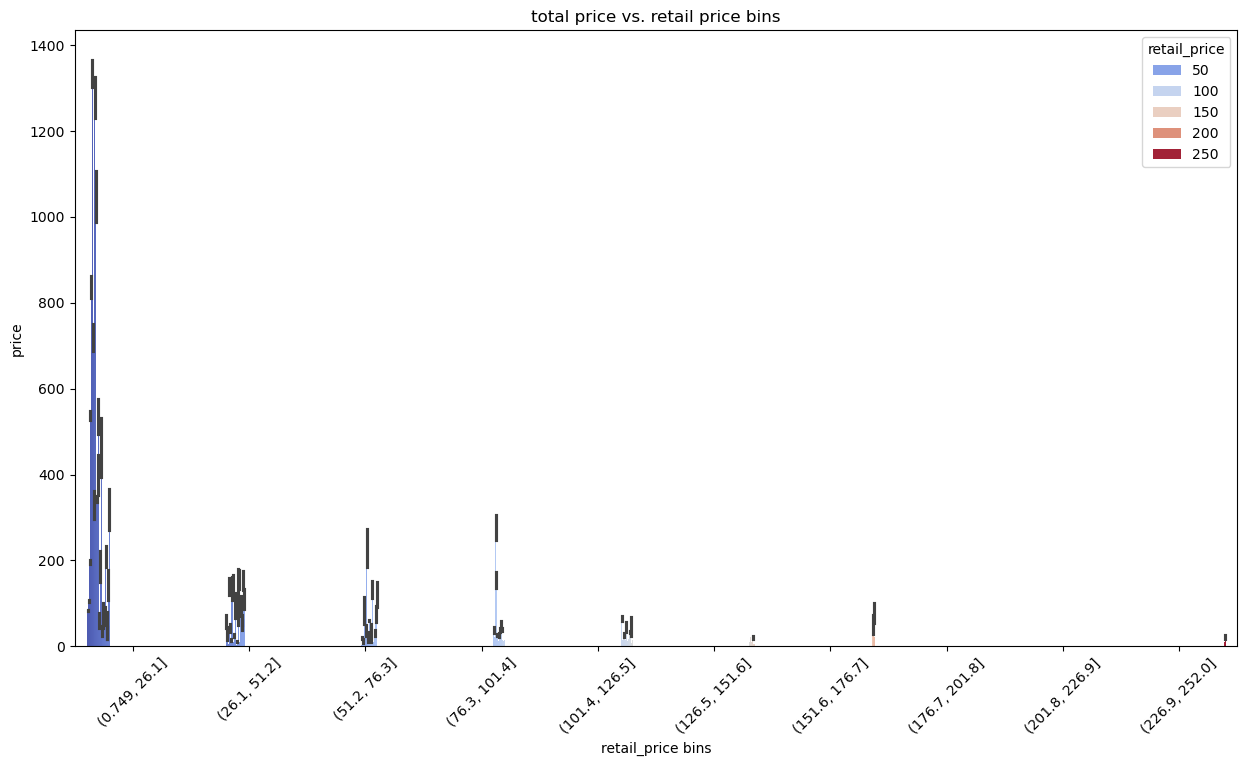

In [24]:
# Create bins for 'retail_price' using equal-width bins
df["price_bin"] = pd.cut(df["retail_price"], bins=10)  
plt.figure(figsize=(15, 8))  # Set the figure size for the plot
# Create a bar plot with sum of 'price' grouped by 'price_bin'
sns.barplot(x=df["price_bin"], y=df["price"], estimator=np.sum, palette="coolwarm", hue="retail_price", data=df)  
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("retail_price bins")  # Set the x-axis label
plt.ylabel("price")  # Set the y-axis label
plt.title("total price vs. retail price bins")  # Set the title of the plot
plt.savefig("total_price_vs_retail_price_bins.png", dpi=300, bbox_inches="tight") # Saves as PNG with high resolution
plt.show()  # Display the plot

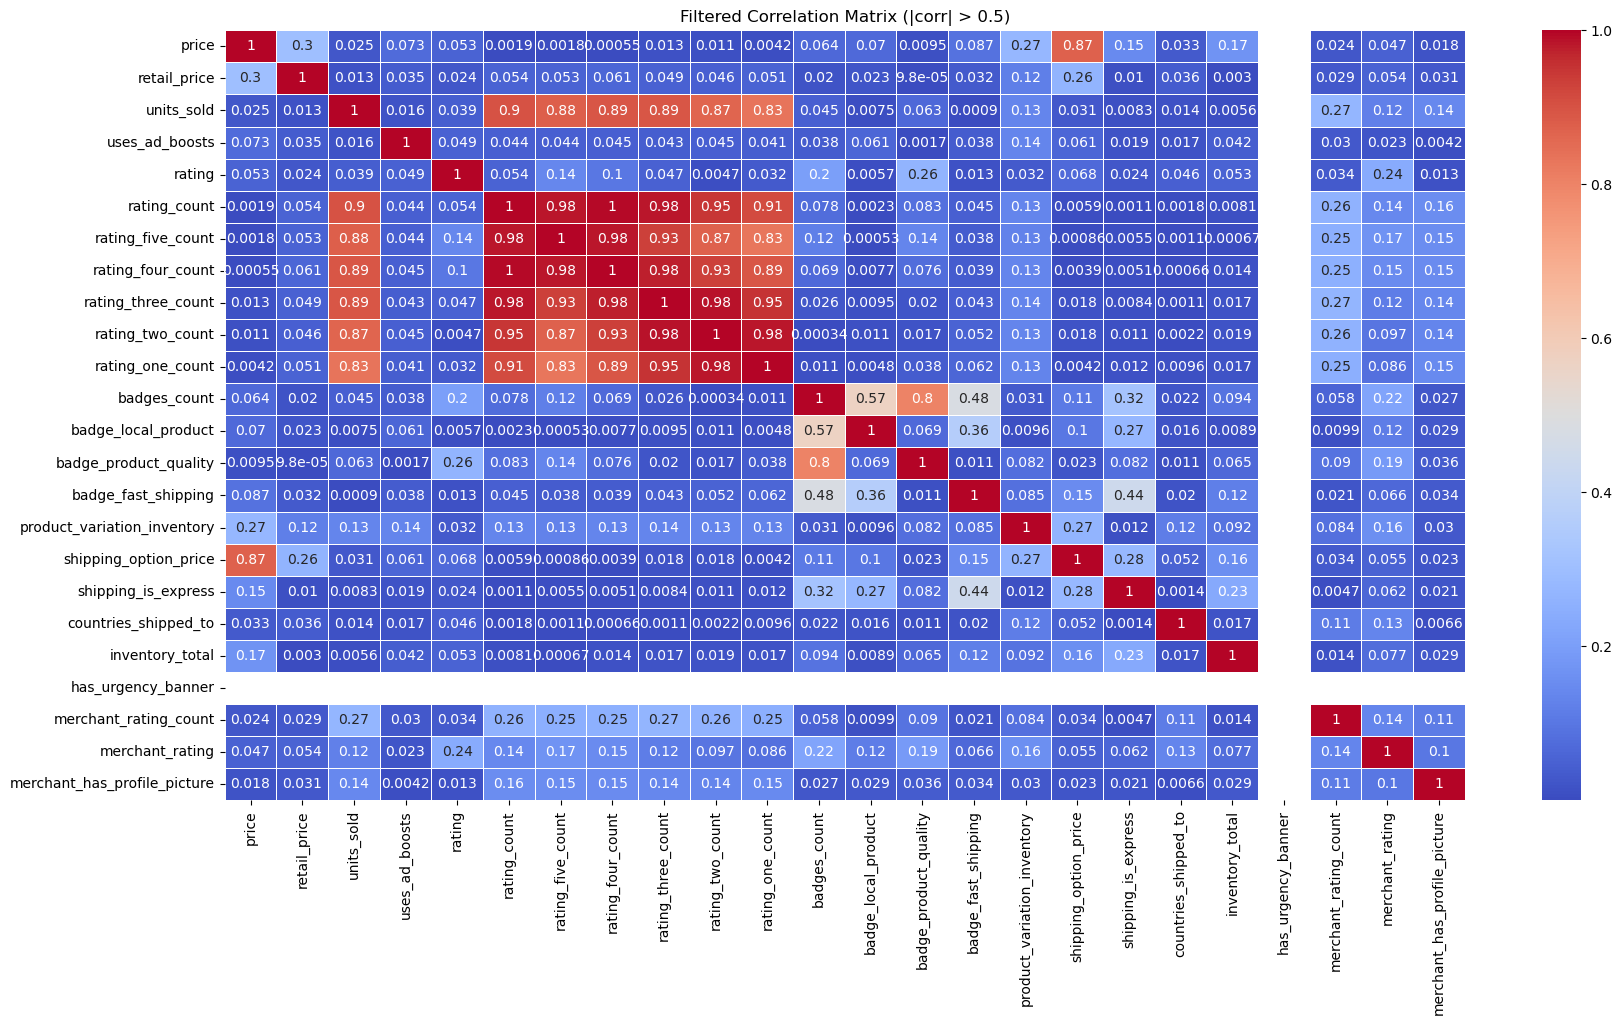

In [26]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])  # Extract numeric columns from the DataFrame

# Correlation Matrix (filtered for correlations > 0.5)
corr_matrix = df_numeric.corr().abs()  # Compute the absolute value of the correlation matrix
# Filter correlations greater than 0.5 and unstack the matrix
filtered_corr = corr_matrix[corr_matrix > 0.5].stack().reset_index()  
# Remove self-correlations (same column pairs)
filtered_corr = filtered_corr[filtered_corr['level_0'] != filtered_corr['level_1']]  

plt.figure(figsize=(20, 10))  # Set the figure size for the heatmap
# Create a heatmap of the correlation matrix with annotations
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)  
plt.title("Filtered Correlation Matrix (|corr| > 0.5)")  # Set the title of the heatmap
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight") # Saves as PNG with high resolution
plt.show()  # Display the heatmap

In [28]:
# Group by 'product_color', sum 'units_sold', sort by descending order, and select top 10
top_products = df.groupby("product_color")["units_sold"].sum().sort_values(ascending = False).head(10)  
print(top_products)  # Print the top 10 products by 'units_sold'

product_color
black     1582313
white     1122227
grey       436190
purple     338480
blue       316238
red        294300
green      291543
pink       258500
yellow     222212
orange     192808
Name: units_sold, dtype: int64


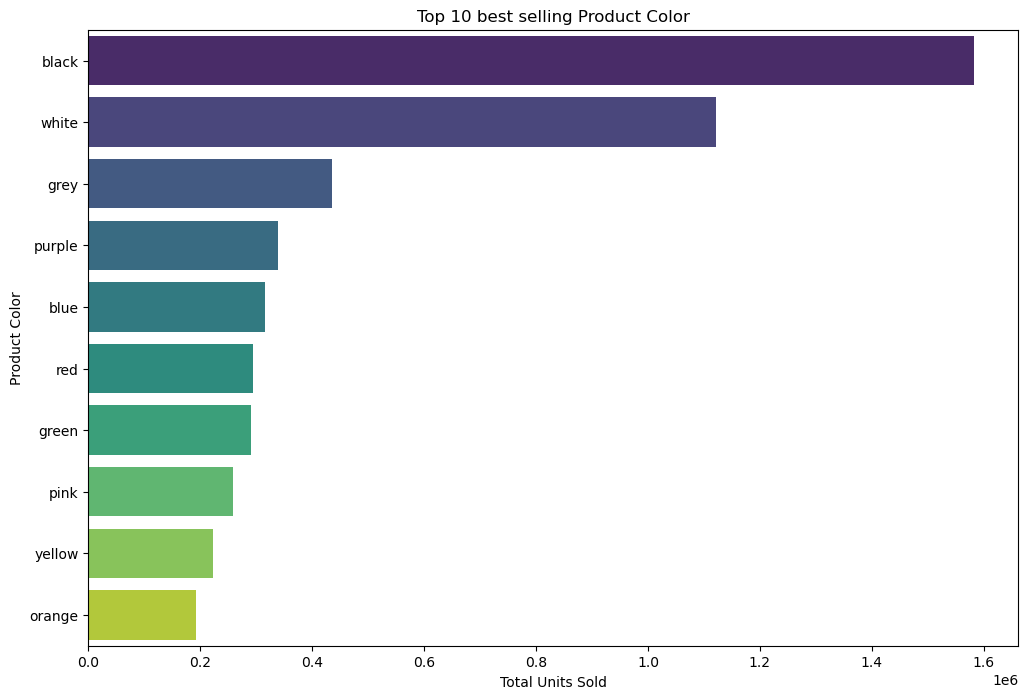

In [32]:
plt.figure(figsize = (12, 8))  # Set the figure size for the plot
# Create a horizontal bar plot for top products by color
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis", hue=top_products.index, dodge=False)  
plt.xlabel("Total Units Sold")  # Set the x-axis label
plt.ylabel("Product Color")  # Set the y-axis label
plt.title("Top 10 best selling Product Color")  # Set the title of the plot
plt.savefig("top_10_best_selling_product_colors.png", dpi=300, bbox_inches="tight") # Saves as PNG with high resolution
plt.show()  # Display the plot

In [36]:
# Group by 'product_color', sum 'units_sold', sort by ascending order, and select bottom 10
worst_products = df.groupby("product_color")["units_sold"].sum().sort_values(ascending = True).head(10)  
print(worst_products)  # Print the worst 10 products by 'units_sold'

product_color
darkgreen                1
offblack                50
rainbow                 50
orange & camouflage    100
tan                    100
camel                  100
brown & yellow         100
Rose red               100
leopardprint           100
pink & black           150
Name: units_sold, dtype: int64


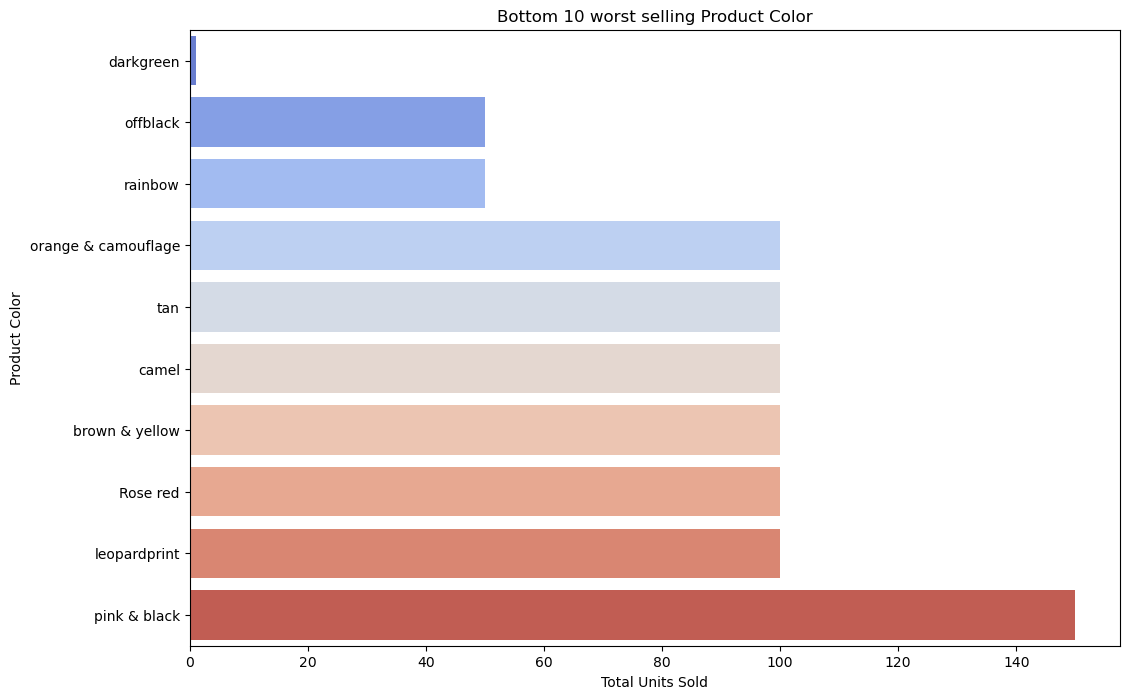

In [38]:
plt.figure(figsize = (12, 8))  # Set the figure size for the plot
# Create a horizontal bar plot for the worst products by color
sns.barplot(x=worst_products.values, y=worst_products.index, palette="coolwarm", hue=worst_products.index, dodge=False) 
plt.xlabel("Total Units Sold")  # Set the x-axis label
plt.ylabel("Product Color")  # Set the y-axis label
plt.title("Bottom 10 worst selling Product Color")  # Set the title of the plot
plt.savefig("bottom_10_worst_selling_product_colors.png", dpi=300, bbox_inches="tight") # Saves as PNG with high resolution
plt.show()  # Display the plot

In [40]:
# Group by 'product_color', sum 'rating_five_count', sort by descending order, and select top 10
best_ratings = df.groupby("product_color")["rating_five_count"].sum().sort_values(ascending = False).head(10)  
print(best_ratings)  # Print the top 10 products by 'rating_five_count'

product_color
black       185829.0
white       101720.0
grey         41286.0
blue         32893.0
green        31114.0
purple       30688.0
red          26482.0
pink         23184.0
yellow       21770.0
navyblue     14552.0
Name: rating_five_count, dtype: float64


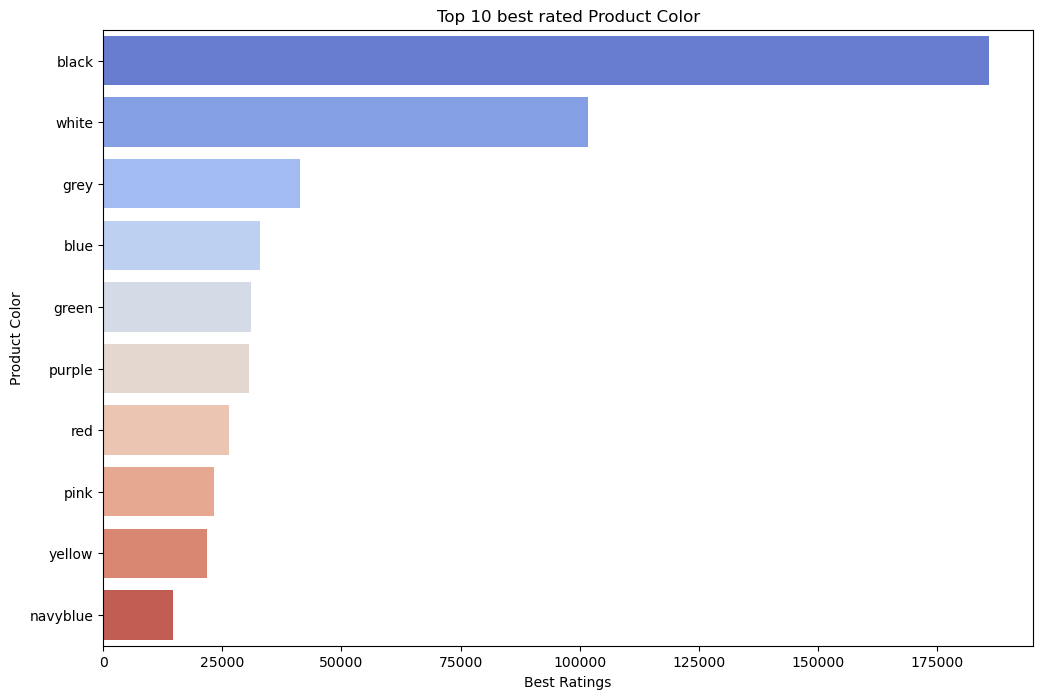

In [42]:
plt.figure(figsize = (12, 8))  # Set the figure size for the plot
# Create a horizontal bar plot for the top-rated products by color
plt.xlabel("Best Ratings")  # Set the x-axis label
sns.barplot(x=best_ratings.values, y=best_ratings.index, palette="coolwarm", hue=best_ratings.index, dodge=False)  
plt.ylabel("Product Color")  # Set the y-axis label
plt.title("Top 10 best rated Product Color")  # Set the title of the plot
plt.savefig("top_10_best_rated_product_colors.png", dpi=300, bbox_inches="tight") # Saves as PNG with high resolution
plt.show()  # Display the plot

In [44]:
print(df["crawl_month"])  # Print the values in the 'crawl_month' column

0       2020-08
1       2020-08
2       2020-08
3       2020-08
4       2020-08
         ...   
1568    2020-08
1569    2020-08
1570    2020-08
1571    2020-08
1572    2020-08
Name: crawl_month, Length: 1573, dtype: object


In [46]:
# Convert 'crawl_month' to datetime format (year-month)
df["crawl_month"] = pd.to_datetime(df["crawl_month"], format="%Y-%m")  
# Print the data type of the 'crawl_month' column after conversion
print(df["crawl_month"].dtype)  

datetime64[ns]


In [48]:
# Extract the year from 'crawl_month' and create a new 'year' column
df["year"] = df["crawl_month"].dt.year
# Extract the month from 'crawl_month' and create a new 'month' column
df["month"] = df["crawl_month"].dt.month
# Print the first 5 rows of 'crawl_month', 'year', and 'month' columns
print(df[["crawl_month", "year", "month"]].head())  

  crawl_month  year  month
0  2020-08-01  2020      8
1  2020-08-01  2020      8
2  2020-08-01  2020      8
3  2020-08-01  2020      8
4  2020-08-01  2020      8


In [50]:
#Print the number of unique values in the 'crawl_month' column
print(df["crawl_month"].nunique())  # if 1, all rows have the same month
# Print the unique values in the 'crawl_month' column
print(df["crawl_month"].unique())  

1
<DatetimeArray>
['2020-08-01 00:00:00']
Length: 1, dtype: datetime64[ns]


In [52]:
# Calculate the 25th percentile (Q1) of the 'retail_price' column
Q1 = df["retail_price"].quantile(0.25)  
# Calculate the 75th percentile (Q3) of the 'retail_price' column
Q3 = df["retail_price"].quantile(0.75)
# Calculate the Interquartile Range (IQR) by subtracting Q1 from Q3
IQR = Q3 - Q1  
# Remove outliers in 'retail_price' based on the IQR method
df_clean = df[~((df["retail_price"] < (Q1 - 1.5 * IQR)) | (df["retail_price"] > (Q3 + 1.5 * IQR)))]  

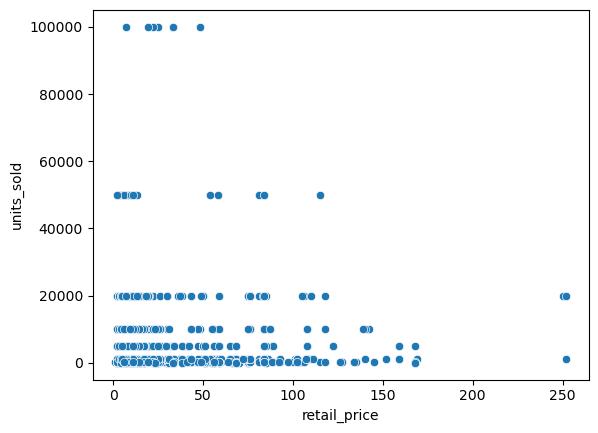

In [54]:
sns.scatterplot(x="retail_price", y="units_sold", data=df)  # Create a scatter plot of 'retail_price' vs 'units_sold'
plt.savefig("retail_price_vs_units_sold_scatter_plot.png", dpi=300, bbox_inches="tight")

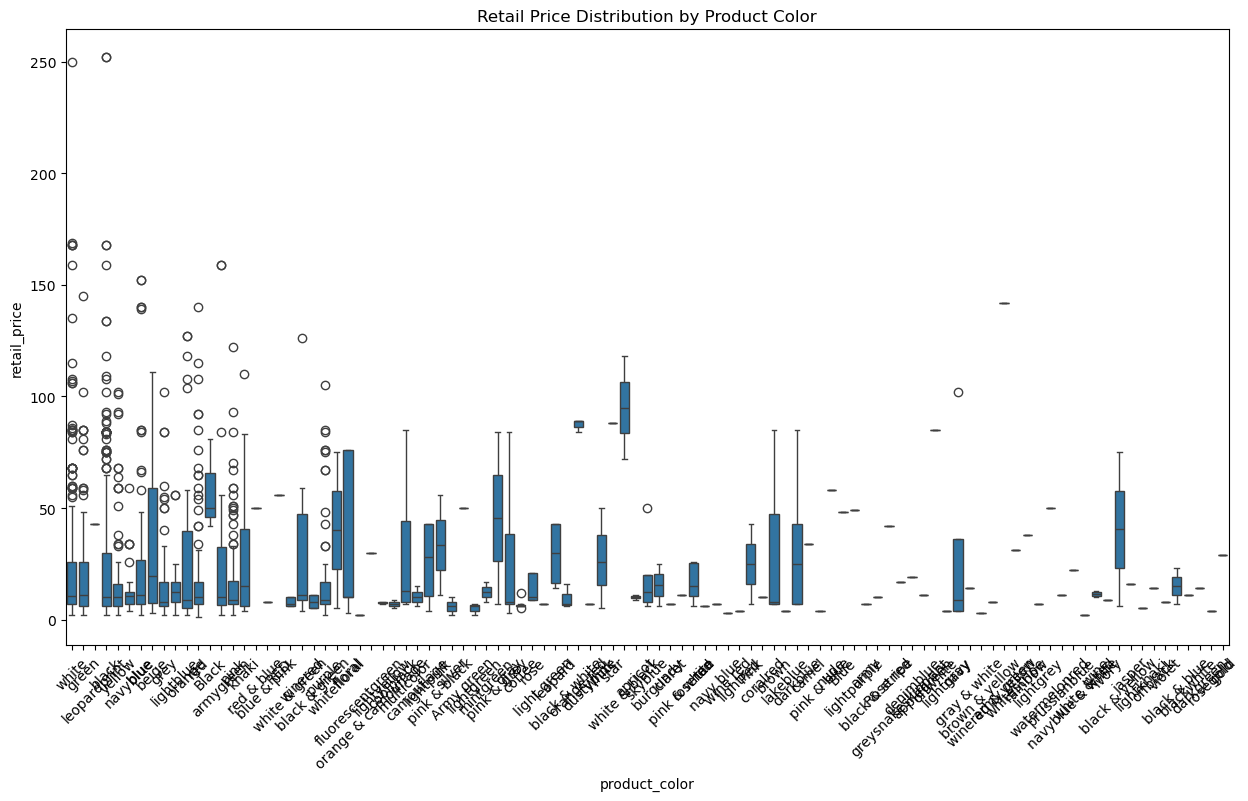

In [56]:
plt.figure(figsize=(15, 8))  # Set the figure size for the box plot
 # Create a box plot of 'retail_price' grouped by 'product_color'
sns.boxplot(x="product_color", y="retail_price", data=df) 
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Retail Price Distribution by Product Color")  # Set the title of the plot
plt.savefig("retail_price_distribution_by_product_color.png", dpi=300, bbox_inches="tight")

In [58]:
# Calculate the discount percentage based on 'retail_price' and 'price'
df["discount_percentage"] = (df["retail_price"] - df["price"]) / df["retail_price"] * 100  
print(df["discount_percentage"])  # Print the 'discount_percentage' column

0      -14.285714
1       63.636364
2       81.395349
3        0.000000
4        9.333333
          ...    
1568    33.333333
1569    96.428571
1570    73.684211
1571   -18.181818
1572   -16.666667
Name: discount_percentage, Length: 1573, dtype: float64


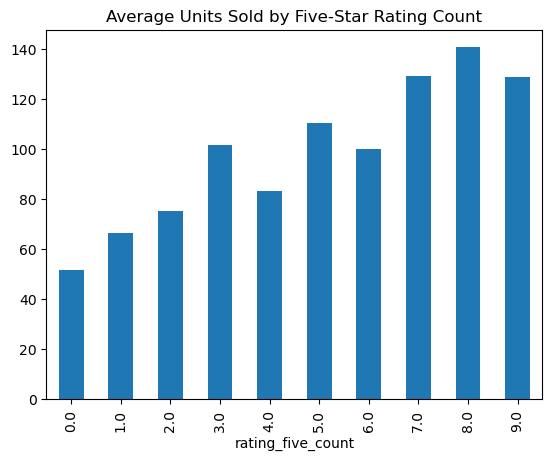

In [60]:
 # Group by 'rating_five_count' and calculate the mean 'units_sold', then select the top 10
sales_by_rating = df.groupby("rating_five_count")["units_sold"].mean().head(10) 
# Create a bar plot of average units sold by five-star rating count
sales_by_rating.plot(kind="bar", title="Average Units Sold by Five-Star Rating Count")  
plt.savefig("average_units_sold_by_rating.png", dpi=300, bbox_inches="tight")

In [62]:
# Calculate the correlation between 'price' and 'units_sold'
corr = df["price"].corr(df["units_sold"])  
print(f"Correlation between price and units sold: {corr:.2f}")  # Print the correlation value rounded to 2 decimal places

Correlation between price and units sold: -0.02


In [66]:
# Group by 'product_color' and generate descriptive statistics for 'units_sold'
df.groupby("product_color")["units_sold"].describe()  

,count,mean,std,min,25%,50%,75%,max
product_color,,,,,,,,
Army green,2.0,1000.000000,0.000000,1000.0,1000.0,1000.0,1000.0,1000.0
Black,3.0,2333.333333,2309.401077,1000.0,1000.0,1000.0,3000.0,5000.0
Blue,1.0,10000.000000,NaN,10000.0,10000.0,10000.0,10000.0,10000.0
Pink,2.0,3000.000000,2828.427125,1000.0,2000.0,3000.0,4000.0,5000.0
RED,1.0,1000.000000,NaN,1000.0,1000.0,1000.0,1000.0,1000.0
...,...,...,...,...,...,...,...,...
wine,2.0,550.000000,636.396103,100.0,325.0,550.0,775.0,1000.0
wine red,1.0,50000.000000,NaN,50000.0,50000.0,50000.0,50000.0,50000.0
winered,28.0,2653.571429,4658.602727,100.0,100.0,1000.0,2000.0,20000.0


In [68]:
# Create synthetic months
months = pd.date_range("2020-06", "2020-08", freq="ME").strftime("%Y-%m").tolist()

# Randomly assign months to rows
df["crawl_month"] = np.random.choice(months, size=len(df))


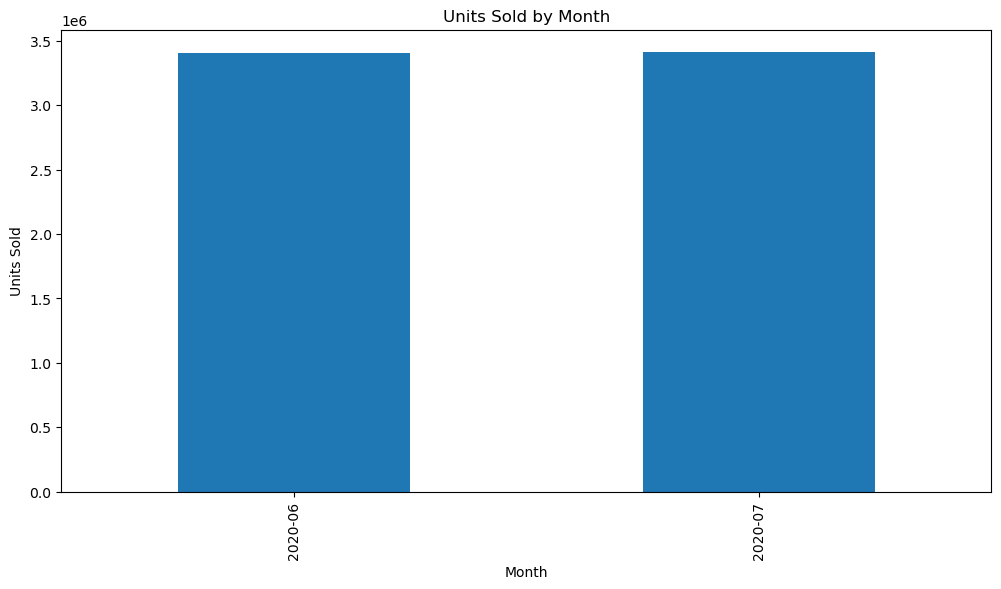

In [70]:
# Group by crawl_month for monthly sales analysis (once multiple months exist)
monthly_sales = df.groupby("crawl_month")["units_sold"].sum()
monthly_sales.plot(kind="bar", figsize=(12, 6), title="Units Sold by Month")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.savefig("monthly_sales_units_sold.png", dpi=300, bbox_inches="tight")
plt.show()

In [72]:
# Extract the month from 'crawl_month' and create a new 'month' column
df["month"] = pd.to_datetime(df["crawl_month"]).dt.month  
# Extract the year from 'crawl_month' and create a new 'year' column
df["year"] = pd.to_datetime(df["crawl_month"]).dt.year  